# Keras - 회귀모델

In [1]:
# 패키지 불러오기
import sys
# sys.path.append("Y:\Python\Mega_IT")

# from yjk_module.preprocessing import *
# from yjk_module.ml_module import *
# from yjk_module.dl_module import *

import warnings
warnings.filterwarnings('ignore')

import os
# os.chdir("Y:\Python\Mega_IT\H.Deep_Learning")
# os.getcwd()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from hossam.util import *
# from hossam.plot import *
from tensorflow import keras

2024-04-25 10:40:37.519080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 10:40:37.519107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 10:40:37.519736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 10:40:37.523661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 10:40:38.038093: W tensorflow/compiler/tf2

In [2]:
# 데이터 불러오기
origin = pd.read_excel("./data/boston.xlsx")
origin.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# 데이터 전처리
# pp = YjkPreprocessor()
# pp.set_strategy(outline = None)
# df_p = pp.fit_transform(origin, yname = 'MEDV')

X = origin.copy() 
Y = X.pop('MEDV')

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [4]:
# 훈련 / 검증 데이터 분리
# x_train, x_test, y_train, y_test = my_train_test_split(df_p, yname = 'MEDV', random_state = 0)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
_, cols = x_train.shape

In [5]:
# 옵티마이저 정의
adam = keras.optimizers.Adam(learning_rate = 0.001)

2024-04-25 10:40:38.677008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22433 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


In [6]:
# 모델 생성 및 컴파일
model = keras.Sequential()

model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (cols,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.compile(optimizer = adam, metrics = ['mae', 'mse'], loss = 'mse')

In [7]:
# 모델 정보 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 콜백 함수 정의
es = keras.callbacks.EarlyStopping(monitor = 'val_mae', patience = 8, restore_best_weights = True)
red = keras.callbacks.ReduceLROnPlateau(monitor = 'val_mae', patience = 4, min_lr = 0.0001)

In [9]:
%%time
# 모델 훈련
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 1000, callbacks = [red, es,
    keras.callbacks.ModelCheckpoint("./models/Best_Boston.keras", save_best_only = True, monitor = 'val_mae')                                                                                           
])

Epoch 1/1000


2024-04-25 10:40:39.419066: I external/local_xla/xla/service/service.cc:168] XLA service 0x55fca2943e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-25 10:40:39.419087: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-04-25 10:40:39.441617: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-25 10:40:39.590288: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-25 10:40:40.005041: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 1/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - loss: 732.1683 - mae: 24.5910 - mse: 732.1683

I0000 00:00:1714009240.829248    7740 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 608.4353 - mae: 22.6633 - mse: 608.4353 - val_loss: 532.4268 - val_mae: 21.1764 - val_mse: 532.4268 - learning_rate: 0.0010
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 527.3759 - mae: 21.0067 - mse: 527.3759 - val_loss: 489.7520 - val_mae: 20.0940 - val_mse: 489.7520 - learning_rate: 0.0010
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 457.0265 - mae: 19.4100 - mse: 457.0265 - val_loss: 435.6560 - val_mae: 18.6405 - val_mse: 435.6560 - learning_rate: 0.0010
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 422.1601 - mae: 18.1947 - mse: 422.1601 - val_loss: 365.2511 - val_mae: 16.7593 - val_mse: 365.2511 - learning_rate: 0.0010
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 348.1611 - mae: 16.2781 - mse: 348.1611 - val_loss: 279.7546 - val_mae: 14.2942 - val_mse: 279.7546 - learning_rate: 0.0010
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254.7144 - mae: 13.4989 - mse: 

In [10]:
# 학습 결과 확인
result_df = pd.DataFrame(history.history)
result_df

,loss,mae,mse,val_loss,val_mae,val_mse,learning_rate
0,574.840820,22.082541,574.840820,532.426758,21.176445,532.426758,0.0010
1,533.108276,21.116182,533.108276,489.752045,20.094002,489.752045,0.0010
2,483.563568,19.866575,483.563568,435.656006,18.640463,435.656006,0.0010
3,420.447937,18.144787,420.447937,365.251099,16.759279,365.251099,0.0010
4,342.321869,16.038744,342.321869,279.754639,14.294176,279.754639,0.0010
...,...,...,...,...,...,...,...
60,21.527151,3.496162,21.527151,24.567713,3.277657,24.567713,0.0010
61,19.538544,3.353506,19.538544,24.566948,3.274241,24.566948,0.0001
62,19.147930,3.319871,19.147930,24.621780,3.270434,24.621780,0.0001
63,20.352242,3.383631,20.352242,24.653730,3.271945,24.653730,0.0001


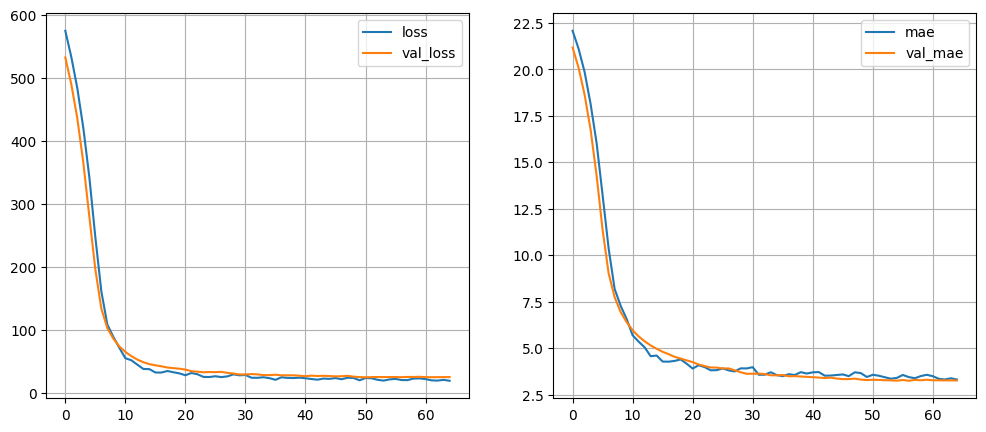

In [11]:
# 학습곡선 확인
# yjk_history_plot(history, metrics = 'mae', figsize = (12, 4), dpi = 150)

hist_dict = history.history
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].plot(hist_dict['loss'], label = 'loss')
ax[0].plot(hist_dict['val_loss'], label = 'val_loss')
ax[0].grid()
ax[0].legend()

ax[1].plot(hist_dict['mae'], label = 'mae')
ax[1].plot(hist_dict['val_mae'], label = 'val_mae')
ax[1].grid()
ax[1].legend()

plt.show()